## 6.10 Homework

The goal of this homework is to create a tree-based regression model for prediction apartment prices (column `'price'`).

In this homework we'll again use the New York City Airbnb Open Data dataset - the same one we used in homework 2 and 3.

You can take it from [Kaggle](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv)
or download from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv)
if you don't want to sign up to Kaggle.

Let's load the data:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
columns = [
    'neighbourhood_group', 'room_type', 'latitude', 'longitude',
    'minimum_nights', 'number_of_reviews','reviews_per_month',
    'calculated_host_listings_count', 'availability_365',
    'price'
]

df = pd.read_csv('AB_NYC_2019.csv', usecols=columns)
df.reviews_per_month = df.reviews_per_month.fillna(0)

* Apply the log tranform to `price`
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1

In [3]:
df.describe().round(3)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000,48895.000,48895.000,48895.000,48895.000,48895.000,48895.000,48895.000
mean,40.729,-73.952,152.721,7.030,23.274,1.091,7.144,112.781
std,0.055,0.046,240.154,20.511,44.551,1.597,32.953,131.622
min,40.500,-74.244,0.000,1.000,0.000,0.000,1.000,0.000
25%,40.690,-73.983,69.000,1.000,1.000,0.040,1.000,0.000
50%,40.723,-73.956,106.000,3.000,5.000,0.370,1.000,45.000
75%,40.763,-73.936,175.000,5.000,24.000,1.580,2.000,227.000
max,40.913,-73.713,10000.000,1250.000,629.000,58.500,327.000,365.000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   latitude                        48895 non-null  float64
 2   longitude                       48895 non-null  float64
 3   room_type                       48895 non-null  object 
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               48895 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 3.7+ MB


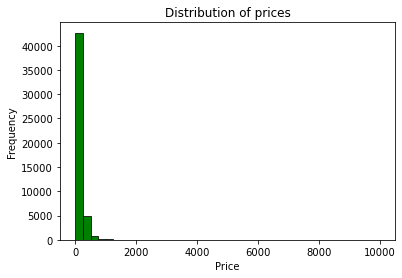

In [5]:
plt.figure(figsize=(6, 4))

sns.histplot(df.price, bins=40, color='green', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

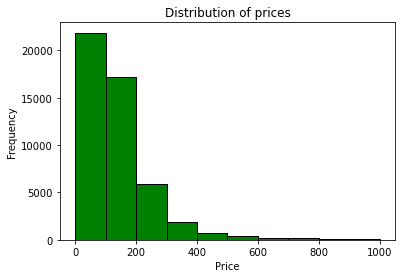

In [6]:
plt.figure(figsize=(6, 4))

sns.histplot(df.price[df.price < 1000], bins=10, color='green', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

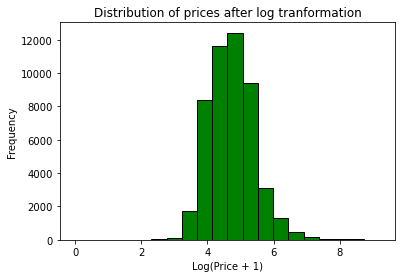

In [7]:
df.price = np.log1p(df.price)

plt.figure(figsize=(6, 4))

sns.histplot(df.price, bins=20, color='green', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [10]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [11]:
y_train = df_train.price.astype('int').values
y_val = df_val.price.astype('int').values
y_test = df_test.price.astype('int').values

del df_train['price']
del df_val['price']
del df_test['price']

Now, use `DictVectorizer` to turn train and validation into matrices:

In [12]:
from sklearn.feature_extraction import DictVectorizer

In [13]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

## Question 1

Let's train a decision tree regressor to predict the price variable. 

* Train a model with `max_depth=1`

In [14]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

Which feature is used for splitting the data?

* `room_type`
* `neighbourhood_group`
* `number_of_reviews`
* `reviews_per_month`

In [16]:
from sklearn.tree import export_text
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- room_type=Entire home/apt <= 0.50
|   |--- value: [3.81]
|--- room_type=Entire home/apt >  0.50
|   |--- value: [4.66]



In [64]:
dv.get_feature_names()

['availability_365',
 'calculated_host_listings_count',
 'latitude',
 'longitude',
 'minimum_nights',
 'neighbourhood_group=Bronx',
 'neighbourhood_group=Brooklyn',
 'neighbourhood_group=Manhattan',
 'neighbourhood_group=Queens',
 'neighbourhood_group=Staten Island',
 'number_of_reviews',
 'reviews_per_month',
 'room_type=Entire home/apt',
 'room_type=Private room',
 'room_type=Shared room']

## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1`  (optional - to make training faster)

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [19]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [20]:
y_pred = rf.predict(X_val)
rmse_score=rmse(y_val, y_pred).round(3)

In [21]:
rmse_score

0.642

What's the RMSE of this model on validation?

* 0.059
* 0.259
* 0.459
* 0.659

## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10
* Set `random_state` to `1`
* Evaluate the model on the validation dataset

In [22]:
scores = []

for n in range(10, 200, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    rmse_score=rmse(y_val, y_pred).round(3)
    
    scores.append((n, rmse_score))

In [23]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

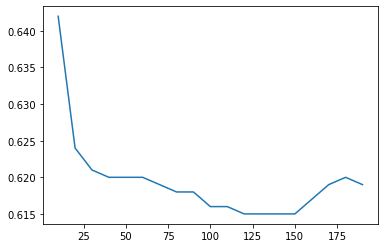

In [24]:
plt.plot(df_scores.n_estimators, df_scores.rmse)

After which value of `n_estimators` does RMSE stop improving?

- 10
- 50
- 70
- 120

## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values, try different values of `n_estimators` from 10 till 200 (with step 10)
* Fix the random seed: `random_state=1`

In [25]:
scores = []

for d in [10, 15, 20, 25]:
    for n in range(10, 200, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1,n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        rmse_score = rmse(y_val, y_pred).round(3)

        scores.append((d, n, rmse_score))

In [26]:
columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

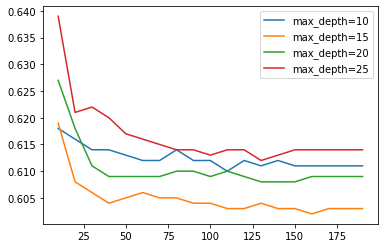

In [27]:
for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.rmse,
             label='max_depth=%d' % d)

plt.legend()

What's the best `max_depth`:

* 10
* 15
* 20
* 25

Bonus question (not graded):

Will the answer be different if we change the seed for the model?

## Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorith, it finds the best split. 
When doint it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the imporatant features 
for tree-based models.

In Scikit-Learn, tree-based models contain this information in the `feature_importances_` field. 

For this homework question, we'll find the most important feature:

* Train the model with these parametes:
    * `n_estimators=10`,
    * `max_depth=20`,
    * `random_state=1`,
    * `n_jobs=-1` (optional)
* Get the feature importance information from this model

In [28]:
rf = RandomForestClassifier(n_estimators=10,
                                    max_depth=20,
                                    random_state=1,n_jobs=-1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)
rmse_score = rmse(y_val, y_pred).round(3)

In [29]:
rmse_score

0.627

What's the most important feature? 

* `neighbourhood_group=Manhattan`
* `room_type=Entire home/apt`	
* `longitude`
* `latitude`

In [57]:
imp=rf.feature_importances_
imp

array([0.10815028, 0.05461524, 0.17587752, 0.18930437, 0.07190371,
       0.00199217, 0.00700831, 0.025025  , 0.00480865, 0.00120974,
       0.08511548, 0.09600321, 0.09212008, 0.07527561, 0.0115906 ])

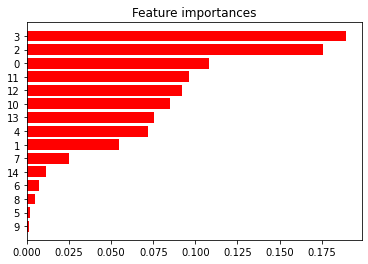

In [63]:
indices = np.argsort(imp)

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(X_val.shape[1]), imp[indices],
       color="r", align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(X_val.shape[1]), indices)
plt.ylim([-1, X_val.shape[1]])
plt.show()

## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

In [34]:
pip install xgboost

In [35]:
import xgboost as xgb

In [36]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [40]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [41]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,verbose_eval=5,evals=watchlist)

[0]	train-rmse:2.71353	val-rmse:2.71043
[5]	train-rmse:0.69843	val-rmse:0.70414
[10]	train-rmse:0.52558	val-rmse:0.54108
[15]	train-rmse:0.51132	val-rmse:0.53317
[20]	train-rmse:0.50457	val-rmse:0.53166
[25]	train-rmse:0.50089	val-rmse:0.53144
[30]	train-rmse:0.49530	val-rmse:0.53150
[35]	train-rmse:0.49198	val-rmse:0.53167
[40]	train-rmse:0.48702	val-rmse:0.53099
[45]	train-rmse:0.48372	val-rmse:0.53075
[50]	train-rmse:0.47919	val-rmse:0.53078
[55]	train-rmse:0.47554	val-rmse:0.53078
[60]	train-rmse:0.47319	val-rmse:0.53060
[65]	train-rmse:0.46903	val-rmse:0.53052
[70]	train-rmse:0.46591	val-rmse:0.53070
[75]	train-rmse:0.46263	val-rmse:0.53078
[80]	train-rmse:0.46009	val-rmse:0.53092
[85]	train-rmse:0.45816	val-rmse:0.53144
[90]	train-rmse:0.45588	val-rmse:0.53166
[95]	train-rmse:0.45292	val-rmse:0.53167
[99]	train-rmse:0.45020	val-rmse:0.53174


In [42]:
y_pred = model.predict(dval)

In [43]:
rmse(y_val, y_pred)

0.5317442427961288

Now change `eta` first to `0.1` and then to `0.01`

In [44]:

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,verbose_eval=5,evals=watchlist)

[0]	train-rmse:3.45806	val-rmse:3.45462
[5]	train-rmse:2.09165	val-rmse:2.08967
[10]	train-rmse:1.31146	val-rmse:1.31166
[15]	train-rmse:0.88713	val-rmse:0.89032
[20]	train-rmse:0.67616	val-rmse:0.68296
[25]	train-rmse:0.58124	val-rmse:0.59190
[30]	train-rmse:0.54190	val-rmse:0.55521
[35]	train-rmse:0.52531	val-rmse:0.54115
[40]	train-rmse:0.51741	val-rmse:0.53515
[45]	train-rmse:0.51283	val-rmse:0.53234
[50]	train-rmse:0.50981	val-rmse:0.53106
[55]	train-rmse:0.50811	val-rmse:0.53072
[60]	train-rmse:0.50606	val-rmse:0.53024
[65]	train-rmse:0.50421	val-rmse:0.52987
[70]	train-rmse:0.50305	val-rmse:0.52978
[75]	train-rmse:0.50112	val-rmse:0.52957
[80]	train-rmse:0.50004	val-rmse:0.52952
[85]	train-rmse:0.49918	val-rmse:0.52948
[90]	train-rmse:0.49737	val-rmse:0.52907
[95]	train-rmse:0.49654	val-rmse:0.52914
[99]	train-rmse:0.49460	val-rmse:0.52866


In [45]:
y_pred = model.predict(dval)

In [46]:
rmse(y_val, y_pred)

0.5286570827639981

In [47]:
xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,verbose_eval=5,evals=watchlist)

[0]	train-rmse:3.79474	val-rmse:3.79116
[5]	train-rmse:3.61313	val-rmse:3.60962
[10]	train-rmse:3.44062	val-rmse:3.43720
[15]	train-rmse:3.27675	val-rmse:3.27344
[20]	train-rmse:3.12114	val-rmse:3.11792
[25]	train-rmse:2.97336	val-rmse:2.97027
[30]	train-rmse:2.83303	val-rmse:2.83006
[35]	train-rmse:2.69981	val-rmse:2.69697
[40]	train-rmse:2.57336	val-rmse:2.57063
[45]	train-rmse:2.45336	val-rmse:2.45071
[50]	train-rmse:2.33949	val-rmse:2.33698
[55]	train-rmse:2.23146	val-rmse:2.22916
[60]	train-rmse:2.12901	val-rmse:2.12691
[65]	train-rmse:2.03188	val-rmse:2.02995
[70]	train-rmse:1.93982	val-rmse:1.93808
[75]	train-rmse:1.85257	val-rmse:1.85103
[80]	train-rmse:1.76994	val-rmse:1.76862
[85]	train-rmse:1.69169	val-rmse:1.69061
[90]	train-rmse:1.61761	val-rmse:1.61674
[95]	train-rmse:1.54754	val-rmse:1.54692
[99]	train-rmse:1.49424	val-rmse:1.49379


In [48]:
y_pred = model.predict(dval)

In [49]:
rmse(y_val, y_pred)

1.4937862006396951

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* 0.01

## Submit the results


Submit your results here: https://forms.gle/wQgFkYE6CtdDed4w8

It's possible that your answers won't match exactly. If it's the case, select the closest one.


## Deadline


The deadline for submitting is 20 October 2021, 17:00 CET (Wednesday). After that, the form will be closed.

